# 1. Introduction





  **About the Data**

   The Palmer Penguins dataset contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica. 



**The dataset consists of 7 columns.**










*   species:  penguin species (Chinstrap, Adélie, or Gentoo)
*   culmen_length_mm:  culmen length (mm)
*   culmen_depth_mm:  culmen depth (mm)
*   flipper_length_mm:  flipper length (mm)
*   body_mass_g:  body mass (g)
*   island:  island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago(Antarctica)
*   sex: penguin sex




**Some Terms to know**

1.   What are culmen length & depth?

     **Answer.** The culmen is "the upper ridge of a bird's beak".

2.   What are flippers?

     **Answer.** Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.











  Refrence to the dataset - https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

In [ ]:
pip install pycaret 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 2. Understanding the Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./penguins_size.csv')

In [ ]:
#First 5 rows of data
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#Checking the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

We can see that there is NaN values in culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, sex

# 3. Imputation

In [ ]:
df['sex'].fillna(df['sex'].mode()[0],inplace=True)

Imputing sex data with most frequently occuring data

In [ ]:
features_with_NaN=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in features_with_NaN:
  df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# 4. Visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


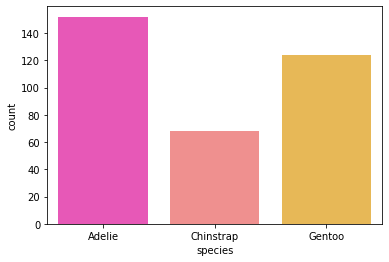

In [ ]:
import seaborn as sns
sns.countplot(df['species'],palette='spring');

We see that our data is mildly imbalanced. As the data is not that big we will not be upscale the minority class or downscale the majority class



More on ---

what is Unbalace in data? 

what upscaling is ?

what downscaling is?

check this out - https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data 

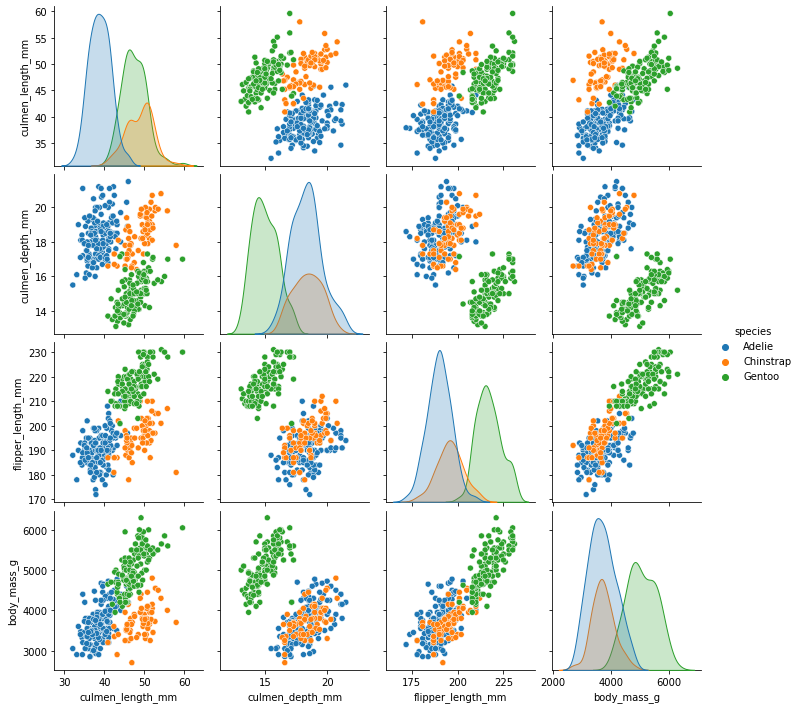

In [ ]:
sns.pairplot(df,hue='species');

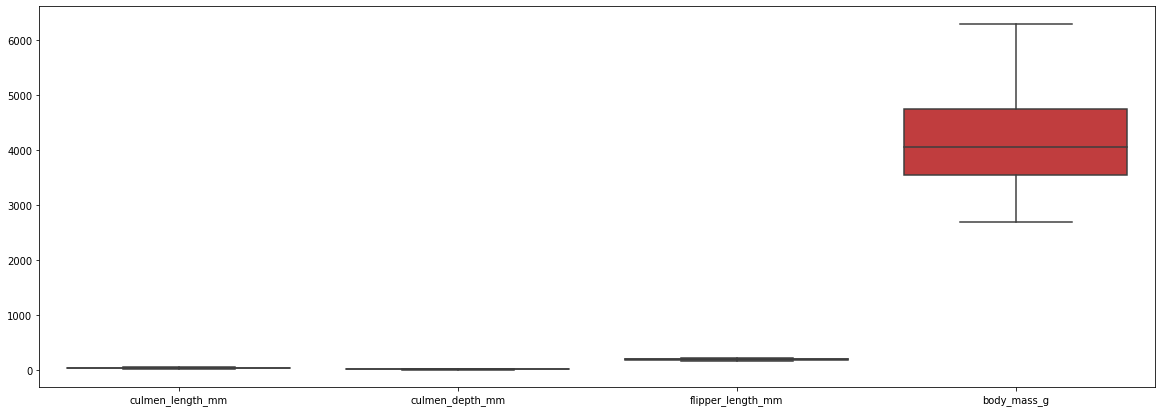

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df)

From the above we can conclude that the feature have variable ranges/not in same range. 

In [ ]:
df_numeric=df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns)
df_numeric.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,-1.307172e-15,1.806927e-15,0.000000,0.000000
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517


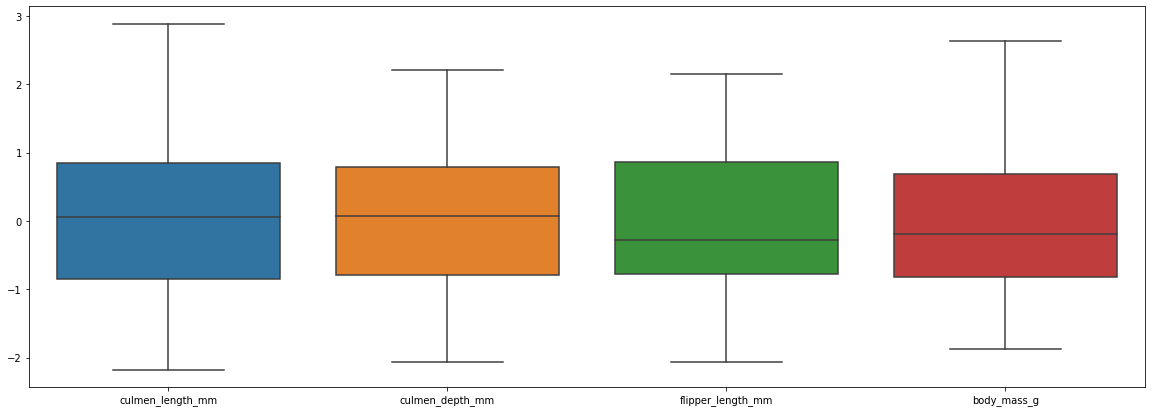

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df_numeric)

now we have scaled data for numeric features

In [ ]:
df_multiclass=df[['sex','species','island']]

In [ ]:
df = pd.concat([df_numeric, df_multiclass], axis=1, join='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   344 non-null    float64
 1   culmen_depth_mm    344 non-null    float64
 2   flipper_length_mm  344 non-null    float64
 3   body_mass_g        344 non-null    float64
 4   sex                344 non-null    object 
 5   species            344 non-null    object 
 6   island             344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


**Checking Catagorical Data**

In [ ]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
df['island'].head(5)

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

In [ ]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [ ]:
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

there is a some irregularity in data. An additional field '.' exist

In [ ]:
df[df['sex']=='.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island
336,0.106346,-0.738072,1.148892,0.843191,.,Gentoo,Biscoe


In [ ]:
df.loc[336,'sex'] = 'FEMALE'

In [ ]:
df['island'].head(5)

0    Torgersen
1    Torgersen
2    Torgersen
3    Torgersen
4    Torgersen
Name: island, dtype: object

In [ ]:

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# integer encode
label_encoder = LabelEncoder()
df['species']= label_encoder.fit_transform(df['species'])
df['island']= label_encoder.fit_transform(df['island'])
df['sex']= label_encoder.fit_transform(df['sex'])


In [ ]:
corr=df.corr()

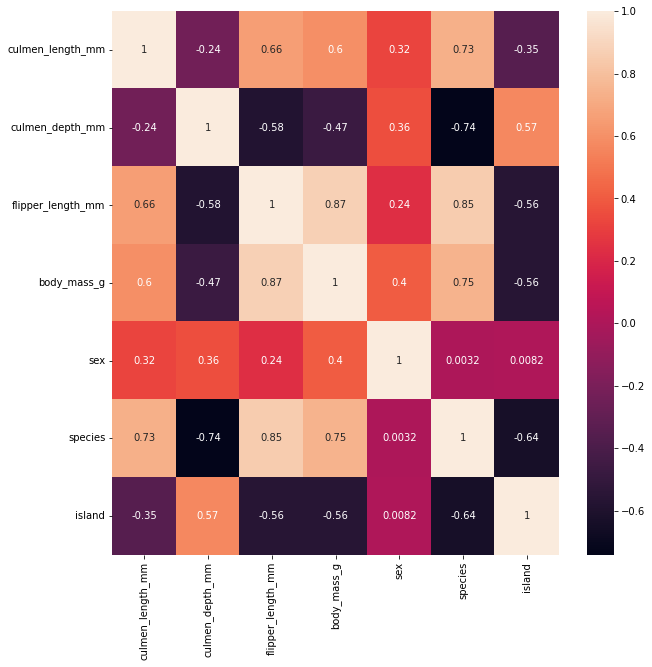

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

We can see that most of the features contribute to our target variable(species) except for sex which has a lower value. Flipper_length_mm being a independent variable highly related to target(species). we also observe collinearity between features Flipper_length_mm and body_mass_g

# 5. Data test Split

In [ ]:
from sklearn.model_selection import train_test_split

df, df_unseen = train_test_split(df, test_size=0.1, random_state=25)

print(df.shape)
print(df_unseen.shape)

(309, 7)
(35, 7)


In [ ]:
pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 3.6 MB/s 
     |████████████████████████████████| 34.6 MB 1.6 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


In [ ]:
from pycaret.classification import *

# MultiClass Classification

In [ ]:
model_description = setup(data = df, target = 'species',feature_selection = True,feature_selection_threshold=0.50,remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,1061
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(309, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1,
                              

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. 

setup() must be called before executing any other function in pycaret.

In [ ]:
print(model_description)

(False, {'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer object at 0x7f410cedb510>, 'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer object at 0x7f410d031b50>, 'recall': <pycaret.containers.metrics.classification.RecallMetricContainer object at 0x7f410cedb590>, 'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer object at 0x7f410cedb690>, 'f1': <pycaret.containers.metrics.classification.F1MetricContainer object at 0x7f410cedb790>, 'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer object at 0x7f410cedb8d0>, 'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer object at 0x7f4116c95410>}, None, False, 'lightgbm', False,      culmen_depth_mm  culmen_length_mm  body_mass_g
71          0.635161         -0.776700    -0.377925
56          0.177417         -0.905478    -0.816275
320        -1.094095          0.842219     0.811880
99          0.686022         -0.132812    -0.12744

From the above we observe the feature flipper_length_mm has been eliminated due to collinearity(with body_mass_g). The features island, sex get eliminated by feature importance as they are not as significant in predicting target(species)  

when used a value of feature_selection_threshold=0.50(higher the vaue more the feature space) and multicollinearity_threshold = 0.8

the features eliminated by pycaret can be validated against the correlation matrix heat map. where low values for features sex and island compared to culmen_depth_mm,  body_mass_g, culmen_length_mm and flipper_length_mm which have values grater than 0.70. 

A high collinearity shown between flipper_length_mm and body_mass_g (value of 0.87) 



In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9861,0.9885,0.9842,0.9875,0.9859,0.9779,0.9789,0.463
qda,Quadratic Discriminant Analysis,0.9859,1.0000,0.9792,0.9873,0.9855,0.9775,0.9785,0.023
lda,Linear Discriminant Analysis,0.9814,1.0000,0.9725,0.9832,0.9808,0.9702,0.9716,0.021
lr,Logistic Regression,0.9768,0.9996,0.9658,0.9797,0.9757,0.9628,0.9651,0.396
knn,K Neighbors Classifier,0.9768,0.9947,0.9658,0.9797,0.9757,0.9628,0.9651,0.121
rf,Random Forest Classifier,0.9723,0.9941,0.9738,0.9755,0.9723,0.9563,0.9578,0.601
ridge,Ridge Classifier,0.9721,0.0000,0.9575,0.9762,0.9700,0.9549,0.9582,0.020
gbc,Gradient Boosting Classifier,0.9677,0.9953,0.9671,0.9709,0.9678,0.9492,0.9508,0.277
svm,SVM - Linear Kernel,0.9675,0.0000,0.9594,0.9722,0.9663,0.9483,0.9513,0.065
dt,Decision Tree Classifier,0.9673,0.9761,0.9693,0.9723,0.9672,0.9489,0.9514,0.021


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1061, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1061, verbose=0,
                     warm_start=False)

Comparing all models to evaluate performance is the starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [ ]:
knn= create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9545,0.9949,0.9167,0.9587,0.9524,0.9262,0.9296
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9091,0.9935,0.8667,0.9242,0.9019,0.8533,0.8658
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9524,0.9583,0.9583,0.9571,0.9520,0.9247,0.9281
8,0.9524,1.0000,0.9167,0.9571,0.9502,0.9236,0.9272


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


We go ahead with "knn" model as it ranks first in order on Accuracy order(that given by compare_model function). the create model trains and evaluates the model based on cross validation fold. the ouput shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

what is folds? 
K-fold cross-validation approach divides the input dataset into K groups of samples of equal sizes. These samples are called folds. For each learning set, the prediction function uses k-1 folds, and the rest of the folds are used for the test set. This approach is a very popular CV approach because it is easy to understand, and the output is less biased than other methods.

The steps for k-fold cross-validation are:

Split the input dataset into K groups

For each group:

1. Take one group as the reserve or test data set.

2. Use remaining groups as the training dataset
Fit the model on the training set and evaluate the performance of the model using the test set.


Let's take an example of 5-folds cross-validation. So, the dataset is grouped into 5 folds. On 1st iteration, the first fold is reserved for test the model, and rest are used to train the model. On 2nd iteration, the second fold is used to test the model, and rest are used to train the model. This process will continue until each fold is not used for the test fold.

more on folds - https://www.javatpoint.com/cross-validation-in-machine-learning

In [ ]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
tuned_knn=tune_model(knn,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9545,0.9643,0.9667,0.9596,0.9547,0.9281,0.9312
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9545,0.9962,0.9167,0.9587,0.9524,0.9262,0.9296
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9091,1.0000,0.8667,0.9242,0.9019,0.8533,0.8658
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9524,0.9583,0.9583,0.9571,0.9520,0.9247,0.9281
8,0.9524,1.0000,0.9167,0.9571,0.9502,0.9236,0.9272


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


The tune_model() function does a random grid search of hyperparameters over a pre-defined search space.


When choose_better is set to True it will always return a better performing model meaning that if hyperparameter tuning doesn't improve the performance, it will return the input model.

Even when using choose_better, the printed dataframe will still be for the tuned model. However, the returned model object will be different.

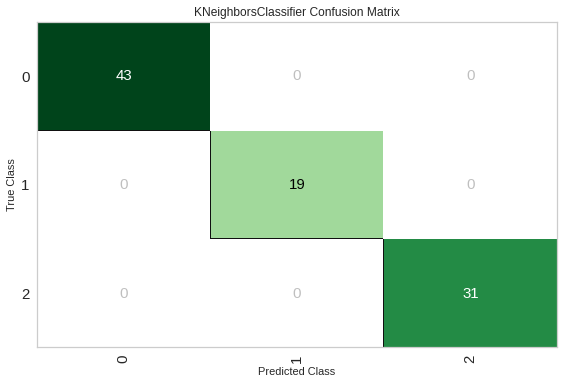

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

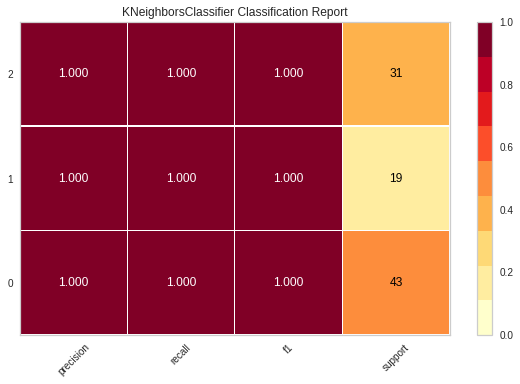

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

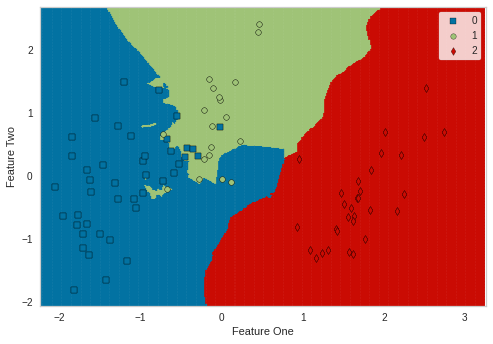

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

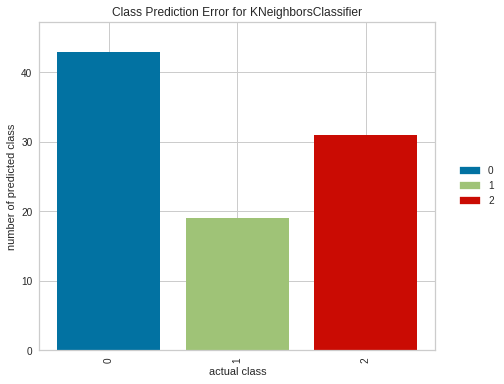

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

from the above we can see the model show high accuracy, recall and precision score with most of the classes in the target variable. In the boundary plot most point being present in their respective region and most of the points being classified as TP(True Positive) in the classification report being classified right.

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_ta

In [ ]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
unseen_predictions = predict_model(final_knn, data=df_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island,Label,Score
83,-1.622954,1.143766,-0.565361,-0.002197,1,0,2,0,1.0
163,1.430917,1.601510,-0.493934,-0.534479,1,1,1,1,1.0
342,0.235124,-1.195816,0.791756,1.250229,0,2,0,2,1.0
73,0.345505,0.889463,-0.279652,-0.064819,1,0,2,0,0.6
134,-1.071049,0.228277,-0.993924,-0.972828,0,0,1,0,1.0


Notice that all of the metrics for final_knn are now set to a perfect 1.000. This is because the final_knn variable is trained on the complete dataset including the test/hold-out set.

# Binary classification

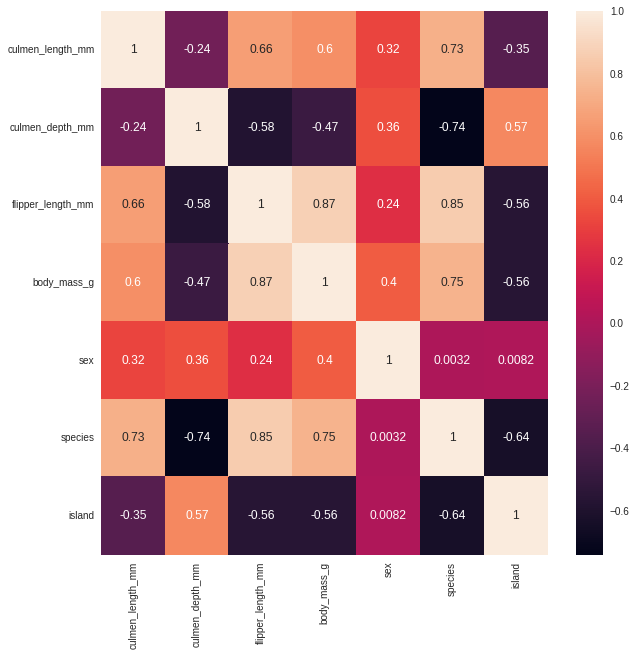

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

from the heat map we can see culmen_length_mm,culmen_depth_mm and body_mass_g contribute the most to sex and species, island contributing the least with values close to 0.

As discussed in multiclassification the features with multicollinerity remains the same. 

In [ ]:
model_description = setup(data = df, target = 'sex',feature_selection = True,feature_selection_threshold=0.50,remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,6345
1,Target,sex
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(309, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sex',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1,
                              

In [ ]:
model_description

(False,
 {'acc': <pycaret.containers.metrics.classification.AccuracyMetricContainer at 0x7f4107229f50>,
  'auc': <pycaret.containers.metrics.classification.ROCAUCMetricContainer at 0x7f4107229e50>,
  'recall': <pycaret.containers.metrics.classification.RecallMetricContainer at 0x7f4107229ed0>,
  'precision': <pycaret.containers.metrics.classification.PrecisionMetricContainer at 0x7f4107240050>,
  'f1': <pycaret.containers.metrics.classification.F1MetricContainer at 0x7f410724d9d0>,
  'kappa': <pycaret.containers.metrics.classification.KappaMetricContainer at 0x7f410724d1d0>,
  'mcc': <pycaret.containers.metrics.classification.MCCMetricContainer at 0x7f410724dc50>},
 None,
 False,
 'lightgbm',
 False,
      island_1  culmen_depth_mm  culmen_length_mm  body_mass_g
 93        1.0         0.482580         -0.795097     0.310909
 0         0.0         0.787742         -0.887081    -0.565789
 87        1.0         0.736882         -1.291811    -0.878896
 127       0.0         0.584301       

From the above we observe the feature flipper_length_mm has been eliminated due to collinearity(with body_mass_g). The features island, sex get eliminated by feature importance as they are not as significant in predicting target(sex)

when used a value of feature_selection_threshold=0.50(higher the vaue more the feature space) and multicollinearity_threshold = 0.8

the features eliminated by pycaret can be validated against the correlation matrix heat map. where low values for features species and island compared to culmen_depth_mm, body_mass_g, culmen_length_mm and flipper_length_mm which have values grater than 0.23.

A high collinearity shown between flipper_length_mm and body_mass_g (value of 0.87)

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9169,0.9375,0.8955,0.9477,0.9197,0.8337,0.8373,0.118
et,Extra Trees Classifier,0.9165,0.9380,0.8947,0.9491,0.9187,0.8328,0.8385,0.611
lr,Logistic Regression,0.8935,0.9438,0.9045,0.9017,0.9013,0.7857,0.7893,0.024
qda,Quadratic Discriminant Analysis,0.8935,0.9414,0.9045,0.9002,0.8998,0.7862,0.7914,0.030
rf,Random Forest Classifier,0.8890,0.9303,0.8856,0.9088,0.8940,0.7775,0.7836,0.523
ridge,Ridge Classifier,0.8844,0.0000,0.8871,0.8993,0.8910,0.7680,0.7720,0.016
lda,Linear Discriminant Analysis,0.8844,0.9438,0.8871,0.8993,0.8910,0.7680,0.7720,0.034
svm,SVM - Linear Kernel,0.8794,0.0000,0.8955,0.8836,0.8883,0.7575,0.7597,0.019
lightgbm,Light Gradient Boosting Machine,0.8751,0.9176,0.8773,0.8903,0.8800,0.7499,0.7559,0.060
gbc,Gradient Boosting Classifier,0.8749,0.9150,0.8773,0.8891,0.8804,0.7494,0.7545,0.159


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9256,0.9091,0.7692,0.8333,0.6364,0.6472
1,0.9091,0.9339,0.9091,0.9091,0.9091,0.8182,0.8182
2,0.8636,0.8750,0.8333,0.9091,0.8696,0.7273,0.7303
3,0.9091,0.9542,0.9167,0.9167,0.9167,0.8167,0.8167
4,0.9091,0.9708,1.0000,0.8571,0.9231,0.8136,0.8281
5,0.9091,0.8750,0.8333,1.0000,0.9091,0.8197,0.8333
6,0.9048,0.9727,0.8182,1.0000,0.9000,0.8108,0.8257
7,0.8095,0.9273,0.8182,0.8182,0.8182,0.6182,0.6182
8,0.9524,0.9636,0.9091,1.0000,0.9524,0.9050,0.9091


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8636,0.9256,0.9091,0.8333,0.8696,0.7273,0.7303
1,0.8636,0.9339,0.9091,0.8333,0.8696,0.7273,0.7303
2,0.8636,0.8917,0.8333,0.9091,0.8696,0.7273,0.7303
3,0.8636,0.9500,0.9167,0.8462,0.8800,0.7227,0.7258
4,0.8636,0.9667,0.9167,0.8462,0.8800,0.7227,0.7258
5,0.8636,0.8583,0.8333,0.9091,0.8696,0.7273,0.7303
6,0.8095,0.9636,0.7273,0.8889,0.8000,0.6216,0.6331
7,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156
8,0.9524,0.9818,0.9091,1.0000,0.9524,0.9050,0.9091


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


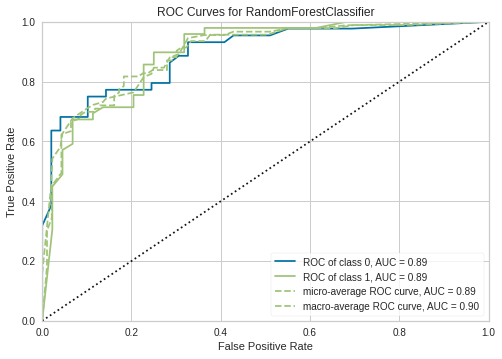

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_rf, plot = 'auc')

In [ ]:
predict_model(tuned_rf);


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8172,0.8947,0.8571,0.8077,0.8317,0.6321,0.6334


In [ ]:
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_im

In [ ]:
predict_model(final_rf);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
unseen_predictions = predict_model(final_rf, data=df_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6345, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9714,0.9933,1.0,0.9375,0.9677,0.9421,0.9437


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species,island,Label,Score
83,-1.622954,1.143766,-0.565361,-0.002197,1,0,2,1,0.69
163,1.430917,1.601510,-0.493934,-0.534479,1,1,1,1,0.89
342,0.235124,-1.195816,0.791756,1.250229,0,2,0,0,0.79
73,0.345505,0.889463,-0.279652,-0.064819,1,0,2,1,0.56
134,-1.071049,0.228277,-0.993924,-0.972828,0,0,1,0,0.84


the model shows high accuracy recall, precision on unseen data.

# Linear regression

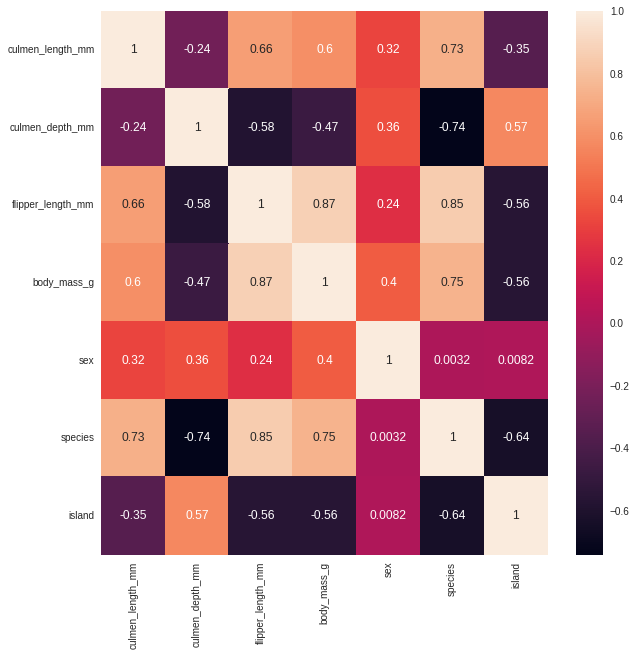

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,xticklabels=df.columns,yticklabels=df.columns,annot=True,ax=ax)

from the heat map we can see species, flipper_length_mm and body_mass_h contribute the most to culmen_length_mm (target) and  island and culmen_depth_mm contributing the least with values close to 0. 

In [ ]:
from pycaret.regression import *

In [ ]:
model_description = setup(data = df, target = 'culmen_length_mm',remove_multicollinearity = True, multicollinearity_threshold = 0.8)

,Description,Value
0,session_id,663
1,Target,culmen_length_mm
2,Original Data,"(309, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(216, 7)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='culmen_length_mm',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dummy', Dummify(target='culmen_length_mm')),
                ('fix_perfect', Remove_100(target='culmen_length_mm')),
                ('clean_names', Clean_C

In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,0.3304,0.1804,0.4204,0.8150,0.2124,0.9024,0.016
br,Bayesian Ridge,0.3300,0.1807,0.4206,0.8146,0.2126,0.9063,0.017
lr,Linear Regression,0.3299,0.1811,0.4212,0.8139,0.2128,0.9111,0.017
lar,Least Angle Regression,0.3299,0.1811,0.4212,0.8139,0.2128,0.9111,0.018
huber,Huber Regressor,0.3300,0.1809,0.4209,0.8138,0.2140,0.9098,0.023
lightgbm,Light Gradient Boosting Machine,0.3302,0.1882,0.4290,0.8093,0.2216,0.9387,0.028
knn,K Neighbors Regressor,0.3396,0.1884,0.4273,0.8067,0.2177,0.9474,0.064
gbr,Gradient Boosting Regressor,0.3477,0.2032,0.4439,0.7892,0.2250,0.9795,0.047
ada,AdaBoost Regressor,0.3531,0.2036,0.4457,0.7872,0.2203,1.0254,0.036
rf,Random Forest Regressor,0.3612,0.2136,0.4531,0.7787,0.2302,1.0031,0.427


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=663, solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=663, solver='auto', tol=0.001)

we can see all the models with their ranking based on accuracy.though we have fixated on using Linear regression. 

In [ ]:
lr=create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3312,0.1846,0.4297,0.7454,0.2361,1.8491
1,0.2549,0.1001,0.3163,0.8421,0.1671,0.8855
2,0.3225,0.1527,0.3907,0.7822,0.2229,0.9439
3,0.3335,0.1912,0.4373,0.8046,0.2359,1.0165
4,0.3047,0.1512,0.3888,0.8697,0.1757,0.3706
5,0.3064,0.1486,0.3855,0.8465,0.2079,0.6316
6,0.4030,0.2799,0.5291,0.7986,0.2463,1.1289
7,0.2755,0.1341,0.3661,0.8730,0.1796,0.2818
8,0.4010,0.2461,0.4961,0.8058,0.2119,0.9826


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:create_model() succesfully completed......................................


We see that our linear regression has MSE value of 0.327 and coefficient of correlation squared (R2) is 74.5%. which is acceptable. the closer the value of MSE to 0 the better. R-Squared above 0.7 would generally be seen as showing a high level of correlation. 

additionally we have a RMSE value of 0.44, where in it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately


more on--

MSE- https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

r2 - https://www.investopedia.com/terms/r/r-squared.asp

In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3312,0.1846,0.4297,0.7454,0.2361,1.8491
1,0.2549,0.1001,0.3163,0.8421,0.1671,0.8855
2,0.3225,0.1527,0.3907,0.7822,0.2229,0.9439
3,0.3335,0.1912,0.4373,0.8046,0.2359,1.0165
4,0.3047,0.1512,0.3888,0.8697,0.1757,0.3706
5,0.3064,0.1486,0.3855,0.8465,0.2079,0.6316
6,0.4030,0.2799,0.5291,0.7986,0.2463,1.1289
7,0.2755,0.1341,0.3661,0.8730,0.1796,0.2818
8,0.4010,0.2461,0.4961,0.8058,0.2119,0.9826


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:tune_model() succesfully completed......................................


On auto tuning the model with default value these seems to be no change. tried tuning the model with optamize(optimize='MSE') based on MSE, RMSE, MAE and R2 there seems to be no change in the mean values.

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2875,0.141,0.3754,0.8452,0.1971,7.454158e+12


We see that our linear regression has MSE value of 0.1304 and coefficient of correlation squared (R2) is 85.6%. the closer the value of MSE to 0 the better. R-Squared greater than 0.7 would generally be seen as showing a high level of correlation.

additionally we have a RMSE value of 0.3611, where in it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately

the model performs very well post tuning on test data

In [ ]:
final_lr = finalize_model(tuned_lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decla

In [ ]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [ ]:
predict_model(final_lr);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2818,0.1367,0.3697,0.8499,0.193,8.012094e+12


In [ ]:
rig=create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3237,0.1791,0.4232,0.7530,0.2322,1.7907
1,0.2550,0.0988,0.3144,0.8440,0.1667,0.8738
2,0.3214,0.1490,0.3860,0.7874,0.2206,0.9437
3,0.3383,0.1931,0.4394,0.8027,0.2360,1.0198
4,0.3021,0.1493,0.3864,0.8713,0.1758,0.3692
5,0.3136,0.1531,0.3913,0.8419,0.2113,0.6413
6,0.4049,0.2802,0.5293,0.7984,0.2455,1.1223
7,0.2813,0.1367,0.3697,0.8705,0.1811,0.2855
8,0.4010,0.2448,0.4947,0.8069,0.2122,0.9666


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=663, solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rig = tune_model(rig)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3305,0.1852,0.4303,0.7446,0.2368,1.8064
1,0.2503,0.0934,0.3056,0.8527,0.1621,0.8171
2,0.3264,0.1510,0.3885,0.7847,0.2220,0.9563
3,0.3383,0.1905,0.4365,0.8053,0.2351,1.0019
4,0.2940,0.1459,0.3819,0.8743,0.1767,0.3594
5,0.3181,0.1579,0.3974,0.8369,0.2153,0.6478
6,0.4002,0.2767,0.5260,0.8009,0.2430,1.1063
7,0.2886,0.1418,0.3766,0.8656,0.1844,0.2925
8,0.4018,0.2435,0.4934,0.8079,0.2136,0.9482


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:Ridge(alpha=1.17, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=663, solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_rig);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=1.17, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=663, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.288,0.1417,0.3764,0.8445,0.1968,6.776347e+12


In [ ]:
lasso=create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8302,0.8835,0.9399,-0.2183,0.5777,1.0582
1,0.6812,0.6346,0.7966,-0.0013,0.5373,0.9856
2,0.7877,0.8449,0.9192,-0.2052,0.5595,1.0056
3,0.8730,1.0192,1.0096,-0.0416,0.6383,1.0019
4,1.0336,1.2923,1.1368,-0.1139,0.6767,1.0213
5,0.9604,1.0951,1.0465,-0.1311,0.6558,1.0256
6,0.9467,1.3930,1.1802,-0.0024,0.6875,0.9812
7,1.0429,1.3049,1.1423,-0.2364,0.6819,0.9936
8,0.9254,1.2747,1.1290,-0.0056,0.6870,1.0008


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=663,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lasso = tune_model(lasso)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8130,0.8480,0.9209,-0.1694,0.6195,1.0
1,0.6803,0.6341,0.7963,-0.0006,0.5460,1.0
2,0.7712,0.8125,0.9014,-0.1589,0.5990,1.0
3,0.8717,1.0139,1.0069,-0.0361,0.6506,1.0
4,1.0216,1.2623,1.1235,-0.0880,0.7170,1.0
5,0.9497,1.0750,1.0368,-0.1103,0.6831,1.0
6,0.9484,1.3917,1.1797,-0.0015,0.6982,1.0
7,1.0329,1.2650,1.1247,-0.1986,0.7206,1.0
8,0.9253,1.2745,1.1289,-0.0054,0.6882,1.0


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:Lasso(alpha=5.44, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=663,
      selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_lasso);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Lasso(alpha=5.44, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=663,
      selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.8448,0.9153,0.9567,-0.005,0.6332,1.0



# **Linear Regression**

---



**Mean Absolute error : 0.2744**				

**Mean Squared error  : 0.1242**

**Root Mean Squared error : 0.3524**

**R-Sqare value : 0.8634** 

# **Lasso Regression(L2)**

---

**Mean Absolute error : 0.9245**

**Mean Squared error  : 1.0653**

**Root Mean Squared error : 1.0322**

**R-Sqare value : -0.0001** 




# **Ridge Regression(L2)**




---


**Mean Absolute error :  0.2801**		

**Mean Squared error  :  0.1293**

**Root Mean Squared error :  0.3596**

**R-Sqare value :  0.8577**


# Linear Regression Assumptions

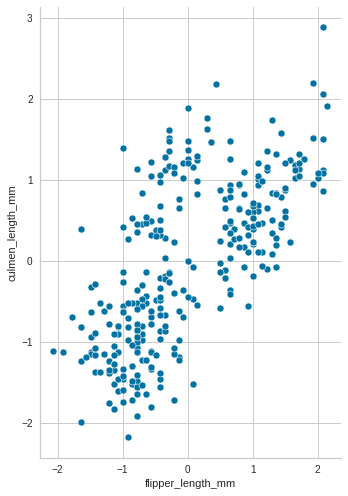

In [ ]:
p = sns.pairplot(df, x_vars=['flipper_length_mm'], y_vars='culmen_length_mm', size=7, aspect=0.7)

flipper_length_mm shows no linear relationship with culmen_length_mm 

In [ ]:
from statsmodels.formula.api import ols

#fit multiple linear regression model
model = ols('culmen_length_mm~species+sex+flipper_length_mm+island', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       culmen_length_mm   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           5.97e-73
Time:                        21:11:21   Log-Likelihood:                -266.37
No. Observations:                 309   AIC:                             542.7
Df Residuals:                     304   BIC:                             561.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4719      0.11

In [ ]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)


2.0071121625104587

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 27.355019773499656),
 ('p-value', 1.6849433798475908e-05),
 ('f-value', 7.381567749277998),
 ('f p-value', 1.099186313459937e-05)]

Text(0.5, 1.0, 'Model1 Residuals Q-Q Plot')

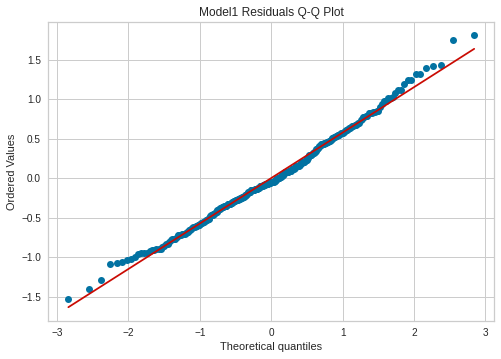

In [ ]:
from scipy import stats
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Model1 Residuals Q-Q Plot")

we can see residual is normally distributed hence linear relationship.

# Answer the following questions



1)  **Is the relationship significant?**

  Answer.

  **MultiClass Classification-** 
  We can see that most of the features contribute to our target variabl(species) except for sex which has a lower value. Flipper_length_mm being a independent variable highly related to target(species).

  **Binary Classification-**

  from the heat map we can see culmen_length_mm,culmen_depth_mm and body_mass_g contribute the most to sex (target) and species, island contributing the least with values close to 0. 

  **linear Regression-**

  from the heat map we can see species, flipper_length_mm and body_mass_h contribute the most to culmen_length_mm (target) and  island and culmen_depth_mm contributing the least with values close to 0.



---


2) **Are any model assumptions violated?**
  Answer.

  **linear Regression-**

  1)**Linearity**- flipper_length_mm shows no linear relationship with culmen_length_mm. hence it is violated

  2) **heteroscedasticity -** p value is 1.6849433798475908e-05 which is less than 0.05, we not fail to reject the null hypothesis.

  3) **Multicollinearity -** only 2 independent variable demostarte Multicollinearity Flipper_length_mm and body_mass_g

  4) **Auto corellation -** 2.0071121625104587 (which is with acceptable range 1.5 and 2.5)

  5) **Residual Normality** - Residual are normally distributed shown by a lot in assumption section

  **Random forest - binary classification**
  No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.
  
  
  **KNN - MultiClass classification**
  The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.In our clustered class diagram we see most of the class points fall within groups. very few away from its class. hence does not violate assumptions of the model


---


3) **Is there any multicollinearity in the model?**

  Answer. 
  
  As collinearity remain common for the whole data set irrespective of the type of classification.we also observe high collinearity between features Flipper_length_mm and body_mass_g 
  
  
  

---



4) **In the multivariate models are predictor variables independent of all the other predictor variables?**

  Answer.
  
  we also observe high collinearity between features Flipper_length_mm and body_mass_g 


---


5) **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**


**Multiclassification**

      * flipper_length_mm 

      * culmen_legth_mm

      * body_mass_g


   **Binary classification**

      *  Species

      *  sex 

      *  island

  
  **linear Regression**

      *  species

      *  sex

      *  flipper_length_mm

      *  island








---



6) **Does the model make sense?**
Answer. 

  Yes. we for target species classification there are 3 classes and KNN supports Multiclass classification. for we use randomm forest which is a  classification algorithm consisting of many decisions trees and can perform binary classification for target variable sex consisting of only 2 classes. for regression we use Linear regression helps in predicting numeric target variable culmen_length_mm using other predictors.



---


7) **Does regularization help?**

  Answer.

  In values on "prediction on test data" section  we see RMSE,MAE,MSE and R-square values only increase on application of L1 and L2. hence there is no affect of regularization.




---



8) **Which independent variables are significant?**
 Answer.

 the features are listed below in same order of their importance

  **Multiclassification**

      * flipper_length_mm 

      * culmen_legth_mm

      * body_mass_g


   **Binary classification**

      *  Species

      *  sex 

      *  island

  
  **linear Regression**

      *  species

      *  sex

      *  flipper_length_mm

      *  island




---



9) **Which hyperparameters are important?**

 Answer 
 
 2 hyperpameter were passed to all models wherein 

 these parameter are set to True 

 1) remove_multicollinearity = True

 2) feature_selection= True

 With their respective threshold

 1)feature_selection_threshold=0.50,

 2)multicollinearity_threshold = 0.8

# References

1) Pycaret offcial documentation

2) Refered Towards Data Science

3) Eli5 official documentation

4) towards data science

5) youtube - stat quest

6) geeksforgeeks

7) Seaborn

8) matplotlib



the official pycaret documentaion has notebooks for regression, binary and MuliClass Classification. The algorithms for imputation were directly referred from sklearn documentation and geeksforgeeks website. For understanding of concepts related to Permutation Importance, classification_report and confusion matrix multiple sources on youtube were used. For plots seaborn’s and matplotlib’s official website was used.

Copyright (c) 2022 Pratik-Prakash-Sannakki

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.